In [1]:
# %load cal_myEnergyBudget.py
from xmitgcm import open_mdsdataset
import xgcm
import os
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import pandas as pd
import numpy as np
import math
from scipy import integrate
import xarray as xr
import string

import os, psutil
process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

140353536


In [2]:
currentDirectory = os.getcwd()
data_dir = currentDirectory[:-7] + '/input/'
print(data_dir)

/scratch/jxchang/HighRes1/results/TideU008N0LinH200ho140Ah0200Cdqdt003/input/


In [3]:
ds1 = open_mdsdataset(data_dir, geometry='cartesian', endian='<',prefix=['energyvars','statevars','statevars2d'])
ds2 = open_mdsdataset(data_dir, geometry='cartesian', endian='<',prefix=['energymvars'])
t = 0
grid = xgcm.Grid(ds1, periodic=False)
print(grid)

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
T Axis (not periodic, boundary=None):
  * center   time
X Axis (not periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center


In [4]:
f0 = 1.e-4
g = 9.8
rhoNil=999.8
rhoConst=rhoNil

om=2*np.pi/12.4/3600
alpha = 2e-4
beta = 0e-4
nz = 200
#dz=H/nz 

tR_fname="../indata/TRef.bin"
tRef = np.fromfile(tR_fname)
refSalt=35.
refTemp=tRef[0]
print('refTemp='+ str(refTemp))
print('tRef='+ str(tRef))

rho2=rhoNil*(1-(alpha*(tRef-refTemp)))
rhoS=np.roll(rho2,1)
N2=g/rhoNil*(rho2-rhoS)/ds1['drF'].values
#print('N2='+str(N2))

N2[0]=g/rhoNil*(rhoS[0]-rho2[0])/ds1['drF'][0]
#print(N2)

refTemp=63.59230581861823
tRef=[63.59230582 40.69584406 33.47293155 31.54712706 29.26896757 28.65696899
 28.23721628 27.65390158 27.08300659 26.5118492  25.90295299 25.69407634
 25.29910279 24.81832859 24.41499174 24.26210069 24.21619203 24.14261024
 24.0996551  24.02495734 23.98958682 23.95165181 23.93411373 23.9224752
 23.91844136 23.91059116 23.87093593 23.86487752 23.86221099 23.85790713
 23.84947122 23.84359894 23.82719386 23.81078878 23.79438371 23.77797863
 23.76157355 23.74516847 23.72876339 23.71235831]


In [5]:
xmin = 34000
xmax = 50000
numcolt=21
numcolv=21
                                        
ttlen=len(ds1.time)
print('the length of time:' + str(ttlen) )

time1=ds1.coords['time']
time2=ds2.coords['time']
xc=ds1.coords['XC']
xg=ds1.coords['XG']
yc=ds1.coords['YC']
yg=ds1.coords['YG']
z=ds1.coords['Z']

the length of time:173


In [6]:
# calculate each face of pressure, velocity
PS = 0.5*(ds1['PHIHYD'].roll(YC=1).values+ds1['PHIHYD'].values) 
PW = 0.5*(ds1['PHIHYD'].roll(XC=1).values+ds1['PHIHYD'].values)

#print(np.shape(PS))
#print('PHIHYD=' + str(ds1['PHIHYD'].isel(YC=0,time=100,Z=2).values))
#print('PS='+ str(PS[100,2,0,:]))
print('PW='+ str(PW[100,:,0,1]))
#print(ds1['PHIHYD'].roll(XC=1)+ds1['PHIHYD'])
#print(ds1['PHIHYD'].roll(XC=1).values[100,2,0,:])
#print(ds1['PHIHYD'].values[100,2,0,:])

#when use interp-> can't with .values???  can't work
#US=xr.DataArray(ds1['UVEL'].interp(XG=xc,YC=yg,kwargs={'fill_value':'extrapolate'}).data,coords=[time1,z,yg,xc],dims=['time','Z','YG','XC'])
#print(US.values)
#VW=(ds1['VVEL'].interp(XC=xg,YG=yc, kwargs={'fill_value': 'None'})).values()

# this US.VW.UC.VC only correct in 2d cases
US=0.5*(ds1['UVEL'].roll(XG=-1).values+ds1['UVEL'].values)
VW=0.5*(ds1['VVEL'].roll(XC=1).values+ds1['VVEL'].values) #VW(when X=0, incorrec
UC=US
VC=ds1['VVEL'].values

#print('U:' + str(ds1['UVEL'].isel(YC=0,time=100,Z=2).values))
#print('US:' +str(US[100,2,0,:]))
#print('V:' +str(ds1['VVEL'].isel(YG=0,time=100,Z=2).values))
#print('VW:' + str(VW[100,2,0,:]))

/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/xarray/core/dataarray.py:3128: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  shifts=shifts, roll_coords=roll_coords, **shifts_kwargs


PW=[0.15596013 0.41172682 0.59362574 0.75308743 0.90223891 1.04430227
 1.18383525 1.32090822 1.45515049 1.58659187 1.71513917 1.84168089
 1.96674166 2.08965466 2.21039938 2.32977995 2.44867296 2.56727292
 2.68558708 2.80361269 2.92136836 3.03894425 3.15638409 3.27375237
 3.39108222 3.50838292 3.62556712 3.7426392  3.85968989 3.97672348
 4.09372582 4.21069308 4.32760569 4.44443785 4.56118953 4.67786075
 4.7944515  4.91096179 5.02739161 5.14374096]


In [7]:
# depth mean pressure
P0S=np.sum(PS*(ds1['drF']*ds1['hFacS']).values,axis=1)
P0W=np.sum(PW*(ds1['drF']*ds1['hFacW']).values,axis=1)
P0C=np.sum((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).values,axis=1)
#print('P0W=' +str(P0W[100,0,:]))
#print(np.shape(P0W))
print(P0S[100,50,721])
print(P0W[100,50,721])
print(P0C[100,50,721])

-0.5494121327512058
-0.08599399966863819
-0.6231909169173049


In [8]:
# depth mean velocity
U0W=((ds1['UVEL']*ds1['drF']*ds1['hFacW']).sum('Z')).values
U0S= np.sum(US*(ds1['drF']*ds1['hFacS']).values,axis=1)
U0C= np.sum(UC*(ds1['drF']*ds1['hFacS']).values,axis=1)
V0W= np.sum(VW*(ds1['drF']*ds1['hFacW']).values,axis=1)
V0S=((ds1['VVEL']*ds1['drF']*ds1['hFacS']).sum('Z')).values
V0C= np.sum(UC*(ds1['drF']*ds1['hFacS']).values,axis=1)
#print(np.shape(U0W))
#print(np.shape(U0S))
print(U0C[100,50,721])

28.22141213435691


In [9]:
print(np.shape(U0W))
print(np.shape(U0S))

(173, 120, 1440)
(173, 120, 1440)


In [10]:
print(U0W[100,50,721])
print(U0S[100,50,721])

27.19583273407303
28.22141213435691


In [11]:
# depth
ZW=((ds1['drF']*ds1['hFacW']).sum('Z')).values
ZS=((ds1['drF']*ds1['hFacS']).sum('Z')).values
ZC=((ds1['drF']*ds1['hFacC']).sum('Z')).values
print(np.shape(ZW))
#print('ZW=' +str(ZW[0,:]))
print(ZC[50,721])
print(ZW[50,721])
print(ZS[50,721])

(120, 1440)
56.17708333333334
56.09375
55.5


In [12]:
# divide depth
for j in range(len(yc)):
    for i in range(len(xc)):
        if ZW[j,i]!=0:
            P0W[:,j,i]=P0W[:,j,i]/ZW[j,i]
        else:
            P0W[:,j,i]=0

    #print(P0W[100,0,:])

    for i in range(len(xc)):
        if ZS[j,i]!=0:
            P0S[:,j,i]=P0S[:,j,i]/ZS[j,i]
        else:
            P0S[:,j,i]=0
            
    for i in range(len(xc)):
        if ZC[j,i]!=0:
            P0C[:,j,i]=P0C[:,j,i]/ZC[j,i]
        else:
            P0C[:,j,i]=0
    #print(P0S[100,0,:])
    #print(U0W[100,0,:])


In [13]:
print(P0C[100,50,721])
print(P0W[100,50,721])
print(P0S[100,50,721])

-0.011093329876517942
-0.001533040662616391
-0.009899317707228933


In [14]:
for j in range(len(yc)):
    for i in range(len(xc)):
        if ZW[j,i]!=0:
            U0W[:,j,i]=U0W[:,j,i]/ZW[j,i]
            V0W[:,j,i]=V0W[:,j,i]/ZW[j,i]
        else:
            U0W[:,j,i]=j
            V0W[:,j,i]=j

    for i in range(len(xc)):
        if ZS[j,i]!=j:
            U0S[:,j,i]=U0S[:,j,i]/ZS[j,i]
            V0S[:,j,i]=V0S[:,j,i]/ZS[j,i]
        else:
            U0S[:,j,i]=j
            V0S[:,j,i]=j

    for i in range(len(xc)):
        if ZC[j,i]!=0:
            U0C[:,j,i]=U0C[:,j,i]/ZC[j,i]
            V0C[:,j,i]=V0C[:,j,i]/ZC[j,i]
        else:
            U0C[:,j,i]=0
            V0C[:,j,i]=0
    #SIZE OF DEPTH MEAN VARIABLE:(TIME,Y,X)
    

/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [15]:
print(U0C[100,50,721])
print(U0W[100,50,721])
print(U0S[100,50,721])

0.5023652076577532
0.484828215872054
0.5084939123307551


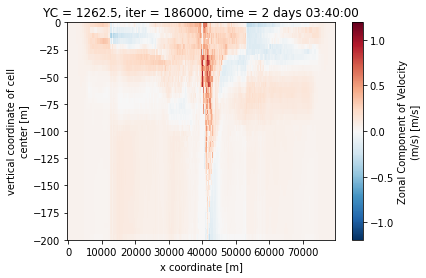

In [16]:
ds1['UVEL'].isel(time=100,YC=50).plot()

In [17]:
ds1['PS']=xr.DataArray(PS,coords=[time1,z,yg,xc],dims=['time','Z','YG','XC'])
ds1['PW']=xr.DataArray(PW,coords=[time1,z,yc,xg],dims=['time','Z','YC','XG'])
ds1['P0S']=xr.DataArray(P0S,coords=[time1,yg,xc],dims=['time','YG','XC'])
ds1['P0W']=xr.DataArray(P0W,coords=[time1,yc,xg],dims=['time','YC','XG'])


In [18]:
ds1['U0S']=xr.DataArray(U0S,coords=[time1,yg,xc],dims=['time','YG','XC'])
ds1['U0W']=xr.DataArray(U0W,coords=[time1,yc,xg],dims=['time','YC','XG'])
ds1['U0C']=xr.DataArray(U0C,coords=[time1,yc,xc],dims=['time','YC','XC'])
ds1['V0S']=xr.DataArray(V0S,coords=[time1,yg,xc],dims=['time','YG','XC'])
ds1['V0W']=xr.DataArray(V0W,coords=[time1,yc,xg],dims=['time','YC','XG'])
ds1['V0C']=xr.DataArray(V0C,coords=[time1,yc,xc],dims=['time','YC','XC'])

ds1['US']=xr.DataArray(US,coords=[time1,z,yg,xc],dims=['time','Z','YG','XC'])
ds1['UC']=xr.DataArray(UC,coords=[time1,z,yc,xc],dims=['time','Z','YC','XC'])
ds1['VW']=xr.DataArray(VW,coords=[time1,z,yc,xg],dims=['time','Z','YC','XG'])
ds1['VC']=xr.DataArray(VC,coords=[time1,z,yc,xc],dims=['time','Z','YC','XC'])

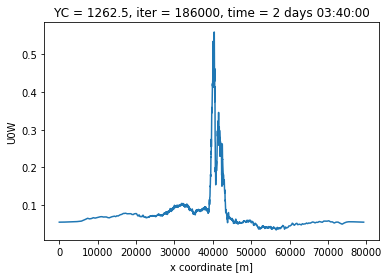

In [19]:
ds1.U0W.isel(time=100,YC=50).plot()

In [20]:
print(ds1['U0W'].isel(time=100,YC=50,XG=721).values)
print(ds1['U0C'].isel(time=100,YC=50,XC=721).values)
print(ds1['U0S'].isel(time=100,YG=50,XC=721).values)

0.484828215872054
0.5023652076577532
0.5084939123307551


In [21]:
ZC=((ds1['drF']*ds1['hFacC']).sum('Z'))
print(ZC.isel(YC=50,XC=721).values)

56.17708333333334


In [22]:
print(ds1['UC'].isel(time=100,YC=50,XC=721).values)
print(ds1['UVEL'].isel(time=100,YC=50,XG=721).values)

[0.28597445 0.1533154  0.30246629 0.01491432 0.43513472 0.51750795
 0.68258116 0.77568097 0.85019086 0.85217674 0.71360493 0.60734648
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
[0.21536456 0.20103094 0.29822437 0.09043017 0.37032129 0.44957029
 0.66101619 0.63613057 0.82303607 0.89795796 0.70643262 0.40983547
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


In [23]:
print(ds1['P0W'].isel(time=100,YC=50,XG=721).values)
print(ds1['P0S'].isel(time=100,YG=50,XC=721).values)
print((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).sum('Z').isel(time=100,YC=50,XC=720).values)
print((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).sum('Z').isel(time=100,YC=50,XC=721).values)
print((ds1['PHIHYD']*ds1['drF']*ds1['hFacC']).sum('Z').isel(time=100,YC=50,XC=722).values)

-0.001533040662616391
-0.009899317707228933
0.4445046999314895
-0.6231909169173049
-0.9915097310620161


In [24]:
#presure work
ds1['uPbt']=ds1['P0W']*ds1['UVEL']*ds1['drF']*ds1['hFacW']*ds1['maskW']
ds1['vPbt']=ds1['P0S']*ds1['VVEL']*ds1['drF']*ds1['hFacS']*ds1['maskS']
#print(ds1['uPbc'])
#print(ds1['vPbc'])
process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

50243235840


In [25]:
#kinetic energy
ds1['EkW'] = 0.5*((ds1['U0W']*ds1['U0W']+ds1['V0W']*ds1['V0W'] )*ds1['maskW']) #
ds1['EkS'] = 0.5*((ds1['U0S']*ds1['U0S']+ds1['V0S']*ds1['V0S'] )*ds1['maskS'])
process = psutil.Process(os.getpid())
print(process.memory_info().rss) 
#print(kEpC[100,:,0,198].values)

50721558528


In [26]:
#potential energy
ds1['uEbt']= ds1['U0W']* ds1['EkW']#
ds1['vEbt']= ds1['U0S']* ds1['EkS']

process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

#print(Ep[100,:,0,198].values)
#print(myEbc[100,:,0,198].values)

50721505280


50763055104


<Figure size 432x288 with 0 Axes>

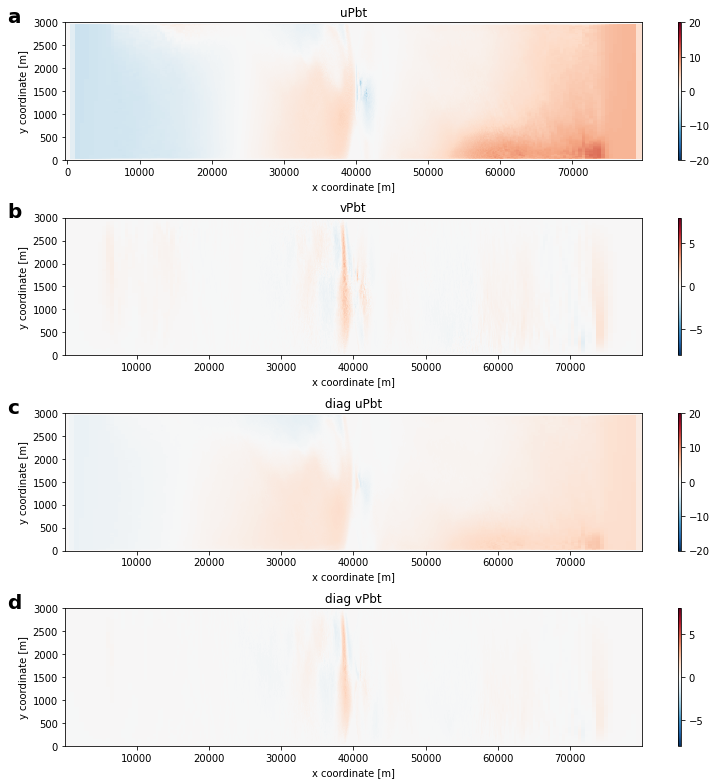

In [27]:
if 1:
    plt.clf()
    f, ax = plt.subplots(4, 1, figsize=(11,11) , sharey=True)
    
    ds1['uPbt'].sum('Z').isel(time=100).plot(ax=ax[0],vmin=-20,vmax=20,cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[0].set_title('uPbt')
    ds1['vPbt'].sum('Z').isel(time=100).plot(ax=ax[1],vmin=-8,vmax=8,cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[1].set_title('vPbt')
    ds2['SDIAG2'].isel(time=100).plot(ax=ax[2],vmin=-20,vmax=20,cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[2].set_title('diag uPbt')
    ds2['SDIAG3'].isel(time=100).plot(ax=ax[3],vmin=-8,vmax=8,cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[3].set_title('diag vPbt')

    for n, axs in enumerate(ax):
        axs.text(-0.1, 1, string.ascii_lowercase[n], transform=axs.transAxes,
                size=20, weight='bold')
    plt.tight_layout()
    plt.savefig('./figs/myuPbt&vPbt_t100.png')
    #plt.show()
    
process = psutil.Process(os.getpid())
print(process.memory_info().rss) 

51281227776


<Figure size 432x288 with 0 Axes>

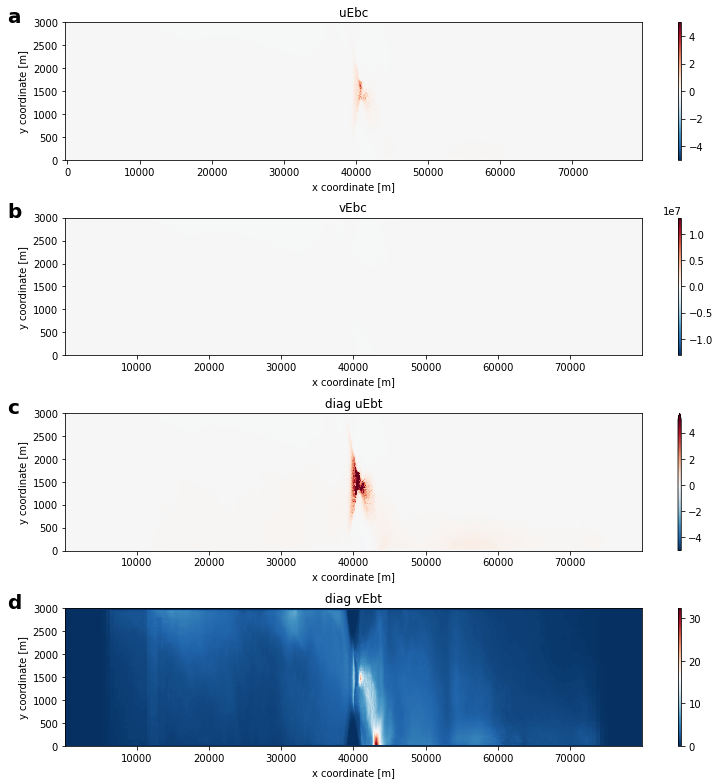

In [28]:
if 1:
    plt.clf()
    f, ax = plt.subplots(4, 1, figsize=(11,11) , sharey=True)
    
    ds1['uEbt'].sum('Z').isel(time=100).plot(ax=ax[0],vmin=-5,vmax=5,cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[0].set_title('uEbt')
    ds1['vEbt'].sum('Z').isel(time=100).plot(ax=ax[1],cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[1].set_title('vEbt')
    ds1['SDIAG4'].isel(time=100).plot(ax=ax[2],vmin=-5,vmax=5,cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[2].set_title('diag uEbt')
    ds2['SDIAG5'].isel(time=100).plot(ax=ax[3],cmap='RdBu_r',cbar_kwargs={"label": "", "aspect": 40})
    ax[3].set_title('diag vEbt')

    for n, axs in enumerate(ax):
        axs.text(-0.1, 1, string.ascii_lowercase[n], transform=axs.transAxes,
                size=20, weight='bold')
    plt.tight_layout()
    plt.savefig('./figs/myuEbt&vEbt_t100.png')
    
process = psutil.Process(os.getpid())
print(process.memory_info().rss)


In [29]:
time=ds2.coords['time'].values/np.timedelta64(1, 's')
time_bin_labels = np.arange(12.4*60*60/2,time[-1]-20000,12.4*60*60)
print('time_bin_labels:' +str(time_bin_labels))
time_bin = pd.timedelta_range(0, periods=8,freq='44660S')
print('time_bin:' + str(time_bin))
time_ns = pd.timedelta_range(0, periods=ttlen,freq='1860S')

time_bin_labels:[ 22320.  66960. 111600. 156240. 200880. 245520. 290160.]
time_bin:TimedeltaIndex(['0 days 00:00:00', '0 days 12:24:20', '1 days 00:48:40',
                '1 days 13:13:00', '2 days 01:37:20', '2 days 14:01:40',
                '3 days 02:26:00', '3 days 14:50:20'],
               dtype='timedelta64[ns]', freq='44660S')


In [30]:
Fxbt=rhoNil*(ds1.uPbt+ds1.uEbt).sum('Z')
Fybt=rhoNil*(ds1.vPbt+ds1.vEbt).sum('Z')
ta_Fxbt=Fxbt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_Fybt=Fybt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()

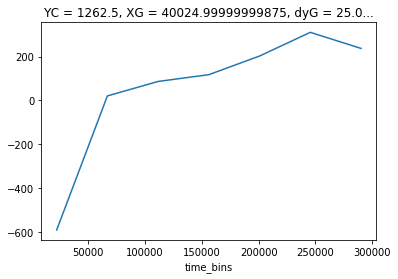

In [31]:
ta_Fxbt.isel(YC=50,XG=721).plot()

In [32]:
xmin = 13000
xmax = 67000
ymin = 0
ymax = 3000
hd_ta_Fbt=(grid.diff(ta_Fxbt*ds2['dyG'],'X',boundary='extrapolate')+grid.diff(ta_Fybt*ds2['dxG'],'Y',boundary='extrapolate'))/ds2['rA']
BTrad=(hd_ta_Fbt*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6

In [33]:
process = psutil.Process(os.getpid())
print(process.memory_info().rss)

51546701824


In [34]:
print(ta_Fxbt)
print(ta_Fybt)

<xarray.DataArray (time_bins: 7, YC: 120, XG: 1440)>
dask.array<stack, shape=(7, 120, 1440), dtype=float64, chunksize=(1, 120, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05
  * YC         (YC) float64 12.5 37.5 62.5 ... 2.938e+03 2.962e+03 2.988e+03
  * XG         (XG) float64 3.411e-13 713.5 1.407e+03 ... 7.859e+04 7.929e+04
    dyG        (YC, XG) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    dxC        (YC, XG) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    rAw        (YC, XG) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    maskInW    (YC, XG) bool dask.array<chunksize=(120, 1440), meta=np.ndarray>
<xarray.DataArray (time_bins: 7, YG: 120, XC: 1440)>
dask.array<stack, shape=(7, 120, 1440), dtype=float64, chunksize=(1, 120, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05
  * XC        

In [35]:
print(BTrad)

<xarray.DataArray (time_bins: 7)>
dask.array<truediv, shape=(7,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05


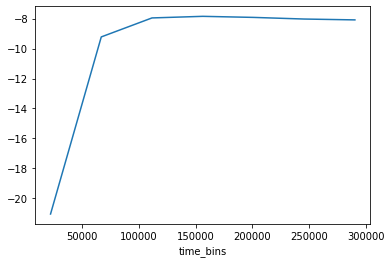

In [36]:
BTrad.plot(label='BTrad')


In [37]:
ix=[i for i, e in enumerate(xc) if (e > xmin) & (e < xmax)]
print(ix[0],ix[-1])

25 1414


In [38]:
fxdy=((ta_Fxbt*ds2['dyG']).isel(XG=ix[-1])-(ta_Fxbt*ds2['dyG']).isel(XG=ix[0])).sum('YC')/1e6

In [39]:
print(fxdy)

<xarray.DataArray (time_bins: 7)>
dask.array<truediv, shape=(7,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05


In [40]:
print((ta_Fxbt*ds2['dyG']).isel(XG=ix[-1]).sum('YC').values)

[-10512141.73745484  -4849333.55804385  -4197685.72839328
  -4188173.1609605   -4232023.49689518  -4310546.09681219
  -4340317.00914305]


In [41]:
print((ta_Fxbt*ds2['dyG']).isel(XG=ix[0]).sum('YC').values)

[10569237.44383569  4576363.6875879   4122314.92213327  4148932.04733745
  4225708.26776089  4297664.83965251  4333159.97764   ]


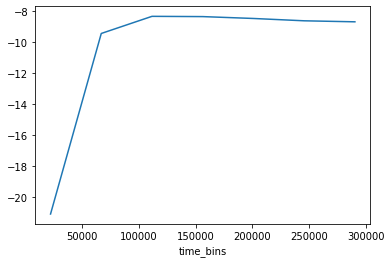

In [42]:
fxdy.plot(label='fxdy')

In [43]:
print(ds2.SDIAG2)

<xarray.DataArray 'SDIAG2' (time: 172, YC: 120, XC: 1440)>
dask.array<concatenate, shape=(172, 120, 1440), dtype=float64, chunksize=(1, 120, 1440), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float64 356.8 1.06e+03 1.745e+03 ... 7.894e+04 7.964e+04
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
    rA       (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    Depth    (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 1440), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:31:00 01:02:00 ... 3 days 16:52:00
Attributes:
    standard_name:  SDIAG2
    long_name:      User-Defined   Surface   Diagnostic  #2
    units:          user-defined


In [44]:
print(ds2.SDIAG2.isel(time=101,YC=50,XC=720).values)
print(ds2.SDIAG2.isel(time=101,YC=50,XC=721).values)
print(ds2.SDIAG2.isel(time=100,YC=50,XC=721).values)
print(ds2.SDIAG2.isel(time=99,YC=50,XC=721).values)

1.2348841239259194
1.2501741291307276
0.04972112271839856
-0.1994119343783805


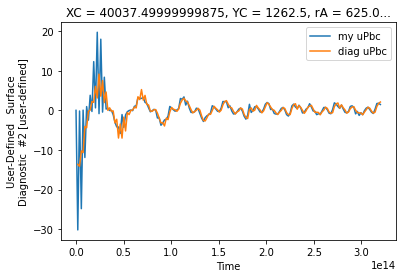

In [45]:
ds1.uPbt.isel(YC=50,XG=721).sum('Z').plot(label='my uPbc')
ds2.SDIAG2.isel(YC=50,XC=721).plot(label='diag uPbc')
plt.legend()

In [46]:
print(ds1.SDIAG4)

<xarray.DataArray 'SDIAG4' (time: 173, YC: 120, XC: 1440)>
dask.array<concatenate, shape=(173, 120, 1440), dtype=float64, chunksize=(1, 120, 1440), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float64 356.8 1.06e+03 1.745e+03 ... 7.894e+04 7.964e+04
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
    rA       (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    Depth    (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 1440), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 00:31:00 ... 3 days 16:52:00
Attributes:
    standard_name:  SDIAG4
    long_name:      User-Defined   Surface   Diagnostic  #4
    units:          user-defined


In [47]:
print(ds1.SDIAG4.isel(time=101,YC=50,XC=721).values)

1.8068462569978485


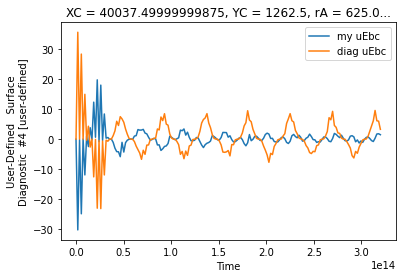

In [48]:
ds1.uPbt.isel(YC=50,XG=721).sum('Z').plot(label='my uEbc')
ds1.SDIAG4.isel(YC=50,XC=721).plot(label='diag uEbc')
plt.legend()

In [50]:
dia_Fxbt=ds2.SDIAG2+ds1.SDIAG4
dia_Fybt=ds2.SDIAG3+ds2.SDIAG5

In [51]:
print(dia_Fxbt)

<xarray.DataArray (time: 172, YC: 120, XC: 1440)>
dask.array<add, shape=(172, 120, 1440), dtype=float64, chunksize=(1, 120, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) timedelta64[ns] 00:31:00 01:02:00 ... 3 days 16:52:00
  * XC       (XC) float64 356.8 1.06e+03 1.745e+03 ... 7.894e+04 7.964e+04
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
    rA       (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    Depth    (YC, XC) float64 dask.array<chunksize=(120, 1440), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 1440), meta=np.ndarray>
    iter     (time) int64 1860 3720 5580 7440 ... 314340 316200 318060 319920


In [52]:
print(dia_Fxbt.isel(time=100,YC=50,XC=721).values*rhoNil)

1856.1960662403037


In [53]:
dia_Fxbt=xr.DataArray(rhoNil*dia_Fxbt.values, coords=[ds2.time.values,yc,xg], dims=['time','YC','XG'])
dia_Fybt=xr.DataArray(rhoNil*dia_Fybt.values, coords=[ds2.time.values,yg,xc], dims=['time','YG','XC'])

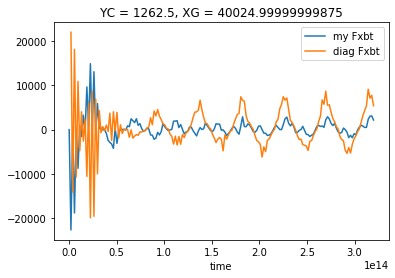

In [54]:
Fxbt.isel(YC=50,XG=721).plot(label='my Fxbt')
dia_Fxbt.isel(YC=50,XG=721).plot(label='diag Fxbt')
plt.legend()

In [55]:
dia_ta_Fxbt=dia_Fxbt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
dia_ta_Fybt=dia_Fybt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()

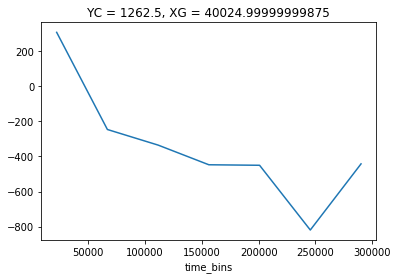

In [56]:
((-1)*dia_ta_Fxbt).isel(YC=50,XG=721).plot()

In [57]:
dia_hd_ta_Fbt=(grid.diff(dia_ta_Fxbt*ds2['dyG'],'X',boundary='extrapolate')+grid.diff(dia_ta_Fybt*ds2['dxG'],'Y',boundary='extrapolate'))/ds2['rA']
dia_BTrad=(dia_hd_ta_Fbt*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6

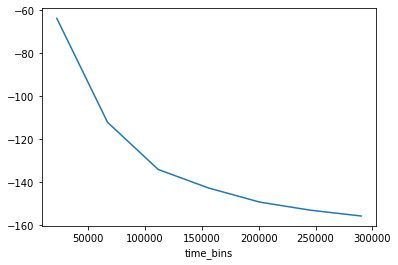

In [58]:
dia_BTrad.plot(label='dia_BTrad')

In [59]:
dia_fxdy=((dia_ta_Fxbt*ds2['dyG']).isel(XG=ix[-1])-(dia_ta_Fxbt*ds2['dyG']).isel(XG=ix[0])).sum('YC')/1e6

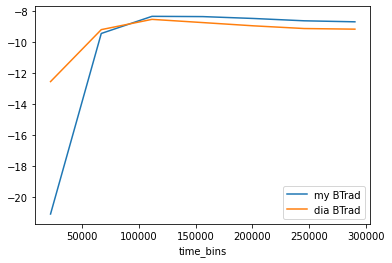

In [60]:
fxdy.plot(label='my BTrad')
dia_fxdy.plot(label='dia BTrad')
plt.legend()

In [61]:
df = pd.DataFrame({"hd Fbt": fxdy.values,"dia hd Fbt": dia_fxdy.values})
print('df')
print(process.memory_info().rss) 
df.to_csv("TidallyAveragedMyhdFbt.csv")
print('saved csv')
print(process.memory_info().rss) 

df
52139212800
saved csv
52139393024


In [62]:
read_df = pd.read_csv("TidallyAveragedMyhdFbt.csv")

In [63]:
print(read_df)

   Unnamed: 0     hd Fbt  dia hd Fbt
0           0 -21.081379  -12.532999
1           1  -9.425697   -9.178286
2           2  -8.320001   -8.515516
3           3  -8.337105   -8.722764
4           4  -8.457732   -8.932615
5           5  -8.608211   -9.107340
6           6  -8.673477   -9.147796
